In [ ]:
import pandas as pd
import numpy as np
import xarray as xr

In [18]:
# Load the parquet data from /Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/parquet
df_hw = pd.read_parquet('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/parquet/HW_1985_1994.parquet')
print(df_hw.info())
df_hw

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20107224 entries, (-40.994766, 288.75, Timestamp('1985-12-01 00:00:00')) to (62.67016, 113.75, Timestamp('1994-07-15 23:00:00'))
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   UHI     float32
 1   UBWI    float32
 2   HW      float64
dtypes: float32(2), float64(1)
memory usage: 442.4 MB
None


UHI      UBWI   HW
lat        lon    time                                        
-40.994766 288.75 1985-12-01 00:00:00  1.284210 -0.116805  1.0
                  1985-12-01 01:00:00  1.196442  0.104045  1.0
                  1985-12-01 02:00:00  1.178253  0.174866  1.0
                  1985-12-01 03:00:00  1.142365  0.199996  1.0
                  1985-12-01 04:00:00  1.093079  0.209863  1.0
...                                         ...       ...  ...
 62.670158 113.75 1994-07-15 19:00:00  2.029236  1.313322  1.0
                  1994-07-15 20:00:00  1.745575  1.034362  1.0
                  1994-07-15 21:00:00  1.385864  0.682290  1.0
                  1994-07-15 22:00:00  0.643921  0.205750  1.0
                  1994-07-15 23:00:00  0.090027 -0.027581  1.0

[20107224 rows x 3 columns]

In [60]:
import pandas as pd
import numpy as np

def convert_index_time_to_local(df):
    """
    Converts the UTC timestamp in the DataFrame's MultiIndex to local time based on longitude.
    
    Parameters:
    df (pd.DataFrame): DataFrame with a MultiIndex (latitude, longitude, UTC timestamp)
    
    Returns:
    pd.DataFrame: DataFrame with the timestamp in the MultiIndex adjusted to local time
    """
    # Function to calculate timezone offset from longitude
    def calculate_timezone_offset(longitude):
        return np.floor(longitude / 15.0).astype(int)  # Approximate, not accounting for DST or specific timezone rules

    # Extract MultiIndex levels
    latitudes, longitudes, timestamps = zip(*df.index)

    # Convert to arrays for vectorized operations
    longitudes = np.array(longitudes)
    timestamps = pd.to_datetime(list(timestamps))

    # Calculate timezone offsets
    offsets = calculate_timezone_offset(longitudes)

    # Adjust timestamps by the offsets
    adjusted_timestamps = [timestamp + pd.Timedelta(hours=offset) for timestamp, offset in zip(timestamps, offsets)]

    # Create a new MultiIndex with the adjusted timestamps
    new_index = pd.MultiIndex.from_arrays([latitudes, longitudes, adjusted_timestamps], names=['Latitude', 'Longitude', 'LocalTime'])

    # Assign the new MultiIndex to the DataFrame and return it
    df.index = new_index
    return df

# Usage example:
# new_df = convert_index_time_to_local(df)
# This will return a DataFrame with the index timestamps adjusted to local time based on longitude
# Note: ONLY CALL THIS FUNCTION ON THE DATAFRAME WITH THE MULTIINDEX (latitude, longitude, UTC timestamp), ALSO ONLY CALL AT THE FINAL STEP(AFTER ALL AGGREATION DONE!!!



In [61]:
df_hw = convert_index_time_to_local(df_hw)
df_hw

UHI      UBWI   HW
Latitude   Longitude LocalTime                                   
-40.994766 288.75    1985-12-01 19:00:00  1.284210 -0.116805  1.0
                     1985-12-01 20:00:00  1.196442  0.104045  1.0
                     1985-12-01 21:00:00  1.178253  0.174866  1.0
                     1985-12-01 22:00:00  1.142365  0.199996  1.0
                     1985-12-01 23:00:00  1.093079  0.209863  1.0
...                                            ...       ...  ...
 62.670158 113.75    1994-07-16 02:00:00  2.029236  1.313322  1.0
                     1994-07-16 03:00:00  1.745575  1.034362  1.0
                     1994-07-16 04:00:00  1.385864  0.682290  1.0
                     1994-07-16 05:00:00  0.643921  0.205750  1.0
                     1994-07-16 06:00:00  0.090027 -0.027581  1.0

[20107224 rows x 3 columns]

In [19]:
df_count = df_hw.groupby(['lat', 'lon']).size()
df_count

lat         lon   
-45.706806  292.50     216
-42.879581  295.00    1776
-40.994766  288.75      24
            297.50     360
-39.109947  291.25    7104
                      ... 
 58.900524  56.25      144
 59.842934  56.25       72
 60.785339  76.25       72
 61.727749  130.00     528
 62.670158  113.75     168
Length: 3390, dtype: int64

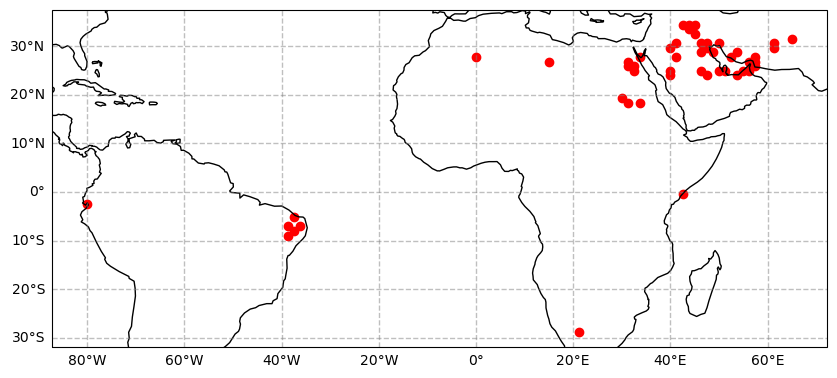

In [22]:
import os
os.environ["PROJ_LIB"] = "/home/jguo/anaconda3/envs/I2000/share/proj"

import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

df_hw = pd.read_parquet('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/parquet/HW_1985_1994.parquet')
df_count = df_hw.groupby(['lat', 'lon']).size()
df_count_sorted = df_count.sort_values(ascending=False).head(50)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

lats, lons = zip(*df_count_sorted.index)
ax.scatter(lons, lats, color='red', transform=ccrs.PlateCarree())

plt.show()

/tmp/ipykernel_164884/959089553.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


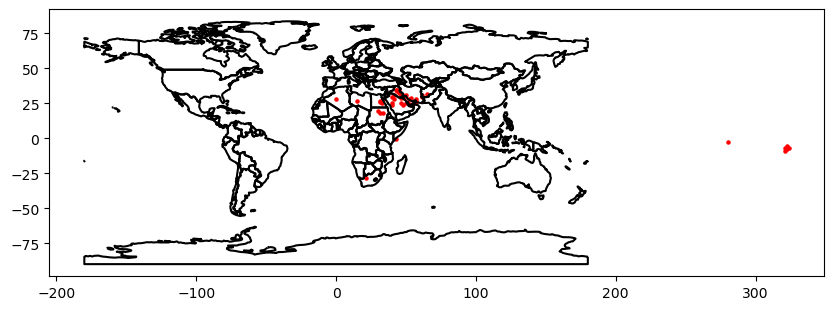

In [24]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df_count_sorted, geometry=gpd.points_from_xy(lons, lats))

# Load Natural Earth dataset with coastlines
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world (coastlines)
fig, ax = plt.subplots(figsize=(10, 5))
world.boundary.plot(ax=ax, color='black')

# Plot the GeoDataFrame
gdf.plot(marker='o', color='red', markersize=5, ax=ax)
plt.show()

In [29]:
df_count_sorted.info()

<class 'pandas.core.series.Series'>
MultiIndex: 50 entries, (-5.183246, 322.5) to (29.685863, 40.0)
Series name: None
Non-Null Count  Dtype
--------------  -----
50 non-null     int64
dtypes: int64(1)
memory usage: 1.9 KB


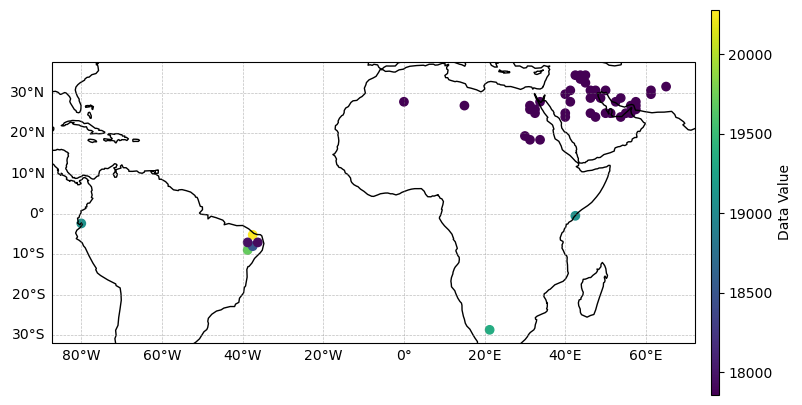

In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Create a plot with coastlines
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Extract latitudes, longitudes, and data values from the MultiIndex Series
latitudes = df_count_sorted.index.get_level_values(0)
longitudes = df_count_sorted.index.get_level_values(1) % 360  # Adjust longitudes if they are in a 0-360 format
data_values = df_count_sorted.values

# Plot the data
scatter = plt.scatter(longitudes, latitudes, c=data_values, cmap='viridis', transform=ccrs.PlateCarree())

# Add gridlines and labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Add a colorbar
cbar = plt.colorbar(scatter, orientation='vertical', pad=0.02, aspect=50)
cbar.set_label('Data Value')

plt.show()




In [58]:
# Convert the Series with a MultiIndex to an xarray DataArray
da = xr.DataArray(df_count_sorted, dims=['lat_lon'], name='data')
da['lat'] = ('lat_lon', df_count_sorted.index.get_level_values('lat'))
da['lon'] = ('lat_lon', df_count_sorted.index.get_level_values('lon'))
# Define the new grid (adjust the resolution as needed)
new_lat = np.linspace(da['lat'].min(), da['lat'].max(), num=100)
new_lon = np.linspace(da['lon'].min(), da['lon'].max(), num=100)

# Interpolate the DataArray onto the new grid
da_interp = da.interp(lat=new_lat, lon=new_lon)


ValueError: cannot set or update variable(s) 'lat', which would corrupt the following index built from coordinates 'lat_lon', 'lat', 'lat', 'lon':
PandasIndex(MultiIndex([(  -5.18324613571167,  322.5),
            ( -8.952879905700684, 321.25),
            ( -28.74345588684082,  21.25),
            ( -2.356020927429199,  280.0),
            (-0.4712041914463043,   42.5),
            (  -8.01047134399414,  322.5),
            ( -7.068062782287598, 321.25),
            ( -7.068062782287598, 323.75),
            ( 30.628273010253906,  46.25),
            ( 30.628273010253906,   47.5),
            (  27.80104637145996,  33.75),
            ( 19.319372177124023,   30.0),
            ( 26.858638763427734,   57.5),
            ( 26.858638763427734,  56.25),
            ( 26.858638763427734,  31.25),
            ( 26.858638763427734,   15.0),
            (  27.80104637145996,  41.25),
            (  27.80104637145996,    0.0),
            ( 18.376962661743164,  31.25),
            ( 18.376962661743164,  33.75),
            ( 25.916231155395508,   32.5),
            ( 25.916231155395508,  31.25),
            ( 30.628273010253906,  61.25),
            ( 30.628273010253906,   50.0),
            (  24.97382164001465,  46.25),
            (  24.97382164001465,   40.0),
            (  24.97382164001465,   32.5),
            (  33.45549774169922,  43.75),
            (  28.74345588684082,  46.25),
            (  24.97382164001465,   55.0),
            (  28.74345588684082,  48.75),
            ( 24.031414031982422,  53.75),
            ( 30.628273010253906,  41.25),
            ( 24.031414031982422,   40.0),
            (  32.51308822631836,   45.0),
            (  27.80104637145996,   57.5),
            (  27.80104637145996,   52.5),
            (  34.39790725708008,  43.75),
            (  34.39790725708008,   45.0),
            (  34.39790725708008,   42.5),
            ( 25.916231155395508,   57.5),
            ( 24.031414031982422,   47.5),
            ( 29.685863494873047,   47.5),
            (  24.97382164001465,  56.25),
            ( 31.570680618286133,   65.0),
            (  28.74345588684082,  53.75),
            (  24.97382164001465,  51.25),
            (  24.97382164001465,   50.0),
            ( 29.685863494873047,  61.25),
            ( 29.685863494873047,   40.0)],
           name='lat_lon'))

In [57]:
da.HW_Count.plot()


ValueError: coords is not dict-like, but it has 2 items, which does not match the 1 dimensions of the data

In [ ]:

df_no_hw = pd.read_parquet('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/parquet/NO_HW_1985_1994.parquet')

print(df_no_hw.info())  


In [ ]:
df_hw.index.levels[2]

In [ ]:
# Ensure 'time' is of datetime type
df_hw.index = df_hw.index.set_levels([df_hw.index.levels[0], df_hw.index.levels[1], pd.to_datetime(df_hw.index.levels[2])])

# Extract hour, month and year from 'time'
df_hw['hour'] = df_hw.index.get_level_values('time').hour
df_hw['month'] = df_hw.index.get_level_values('time').month
df_hw['year'] = df_hw.index.get_level_values('time').year

# Group by 'lat', 'lon', 'year', 'month', and 'hour', then calculate the mean of 'UHI' and 'UBWI'
df_avg = df_hw.groupby(['lat', 'lon', 'year', 'month', 'hour']).mean()
df_avg